# Lewis Hamilton

<img src="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/image.img.1920.medium.jpg/1641811370907.jpg" width="300">

### Team: Mercedes

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/helmet.img.png/1646824671908.png" width="200">

In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

ham_laps <- lap_data %>%
            filter(driverId == 1)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



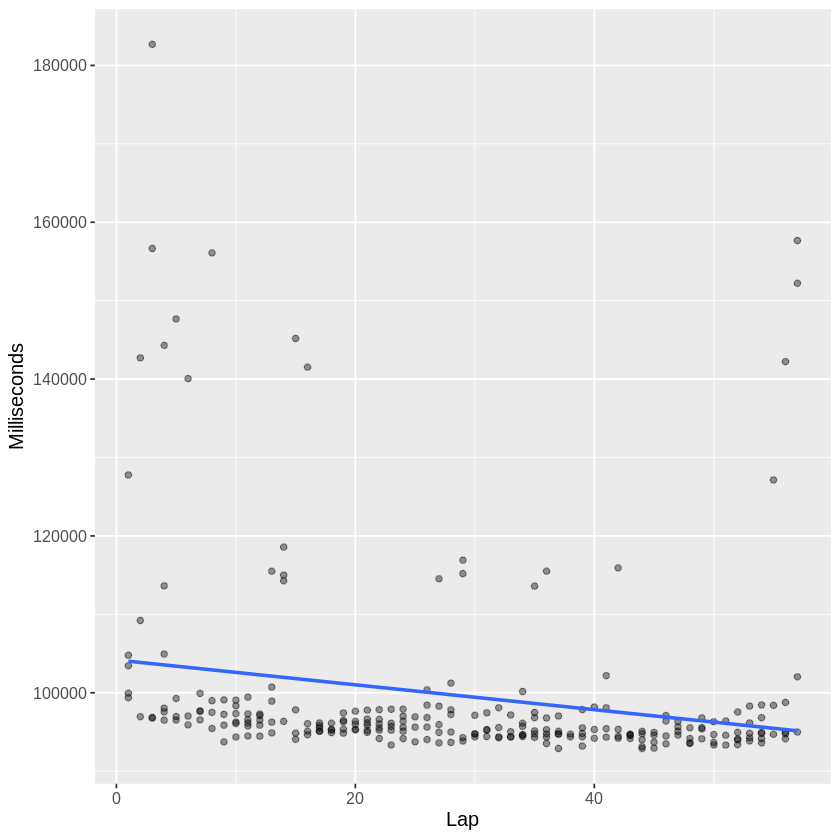

In [5]:
set.seed(2022)

#1.  Bahrain 

lh_bahrain <- ham_laps %>%
                filter(raceId %in% bahrain_race_ID) 

lh_bahrain_clean <- lh_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 49)

lh_bahrain_clean_ID <- lh_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_bahrain_races <- ham_laps %>%
                    filter(raceId %in% lh_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



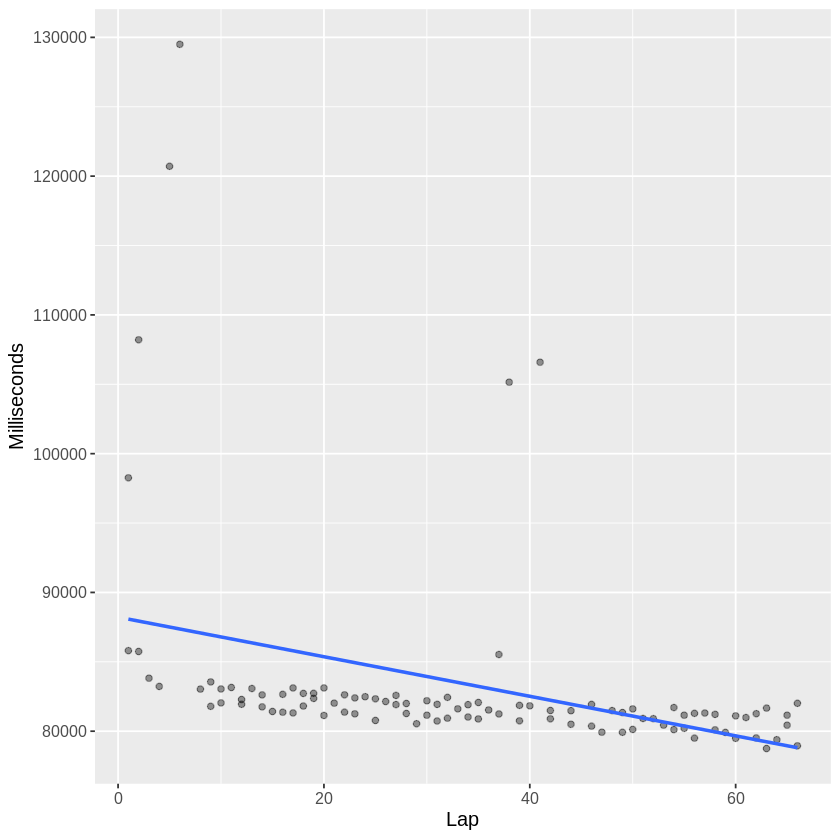

In [6]:
set.seed(2022)

#2. Portimão

lh_Portimão <- ham_laps %>%
                filter(raceId %in% Portimão_race_ID) 

lh_Portimão_clean <- lh_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_Portimão_clean
lh_Portimão_clean_ID <- lh_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_Portimão_races <- ham_laps %>%
                    filter(raceId %in% lh_Portimão_clean_ID) 

formulaone_split <- initial_split(lh_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
1010,58
948,57
969,57


`geom_smooth()` using formula 'y ~ x'



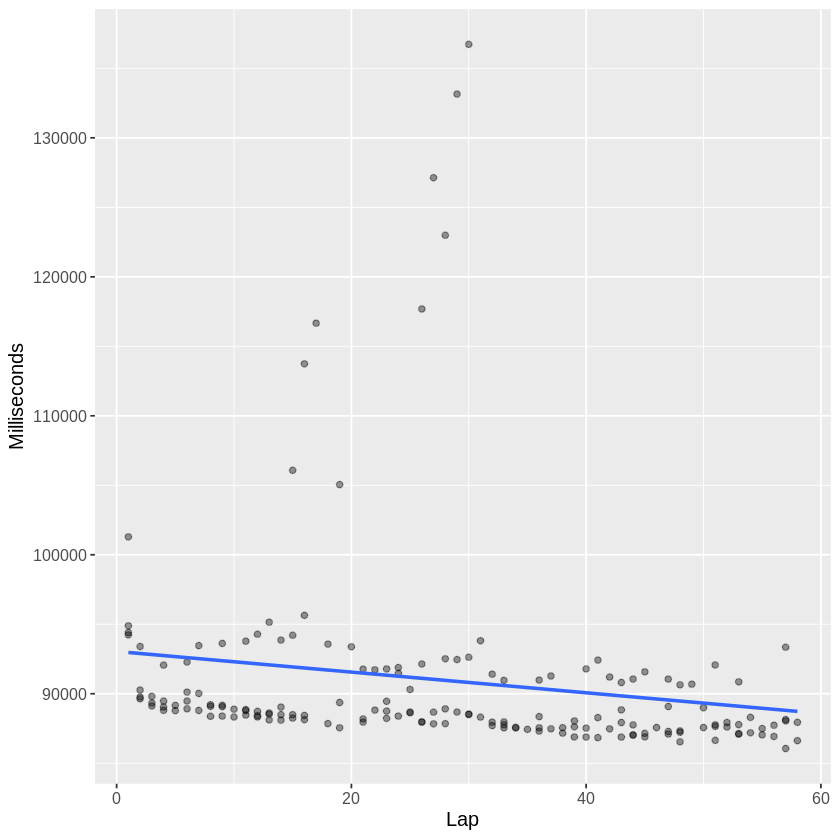

In [7]:
set.seed(2022)

#3.  Australia

lh_aus <- ham_laps %>%
                filter(raceId %in% aus_race_ID) 

lh_aus_clean <- lh_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 2)
lh_aus_clean
lh_aus_clean_ID <- lh_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_aus_races <- ham_laps %>%
                    filter(raceId %in% lh_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



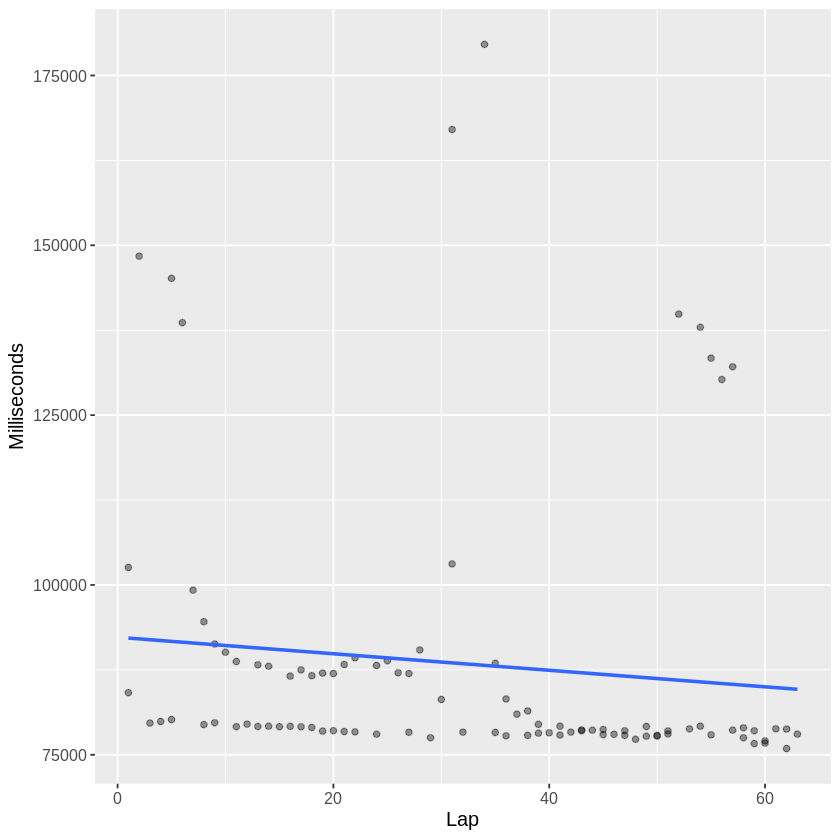

In [8]:
set.seed(2022)

#4.  Italy, Imola

lh_imola <- ham_laps %>%
                filter(raceId %in% imola_race_ID) 

lh_imola_clean <- lh_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_imola_clean
lh_imola_clean_ID <- lh_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_imola_races <- ham_laps %>%
                    filter(raceId %in% lh_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



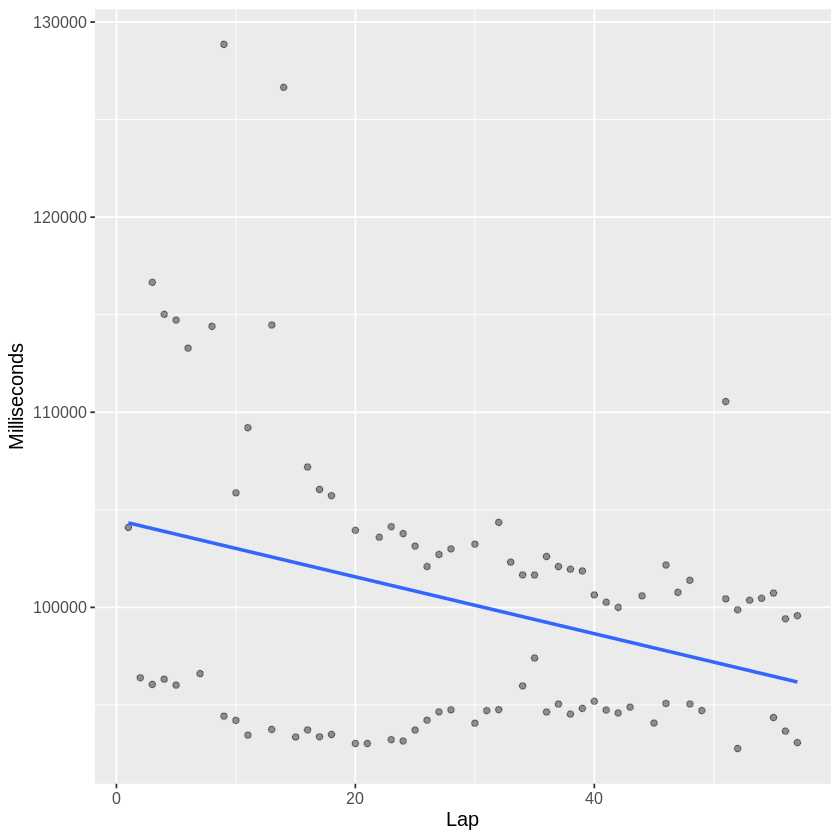

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

lh_turkey <- ham_laps %>%
                filter(raceId %in% turkey_race_ID) 

lh_turkey_clean <- lh_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_turkey_clean
lh_turkey_clean_ID <- lh_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_turkey_races <- ham_laps %>%
                    filter(raceId %in% lh_turkey_clean_ID) 

formulaone_split <- initial_split(lh_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
973,66
993,66
1014,66
1036,66
1055,66


`geom_smooth()` using formula 'y ~ x'



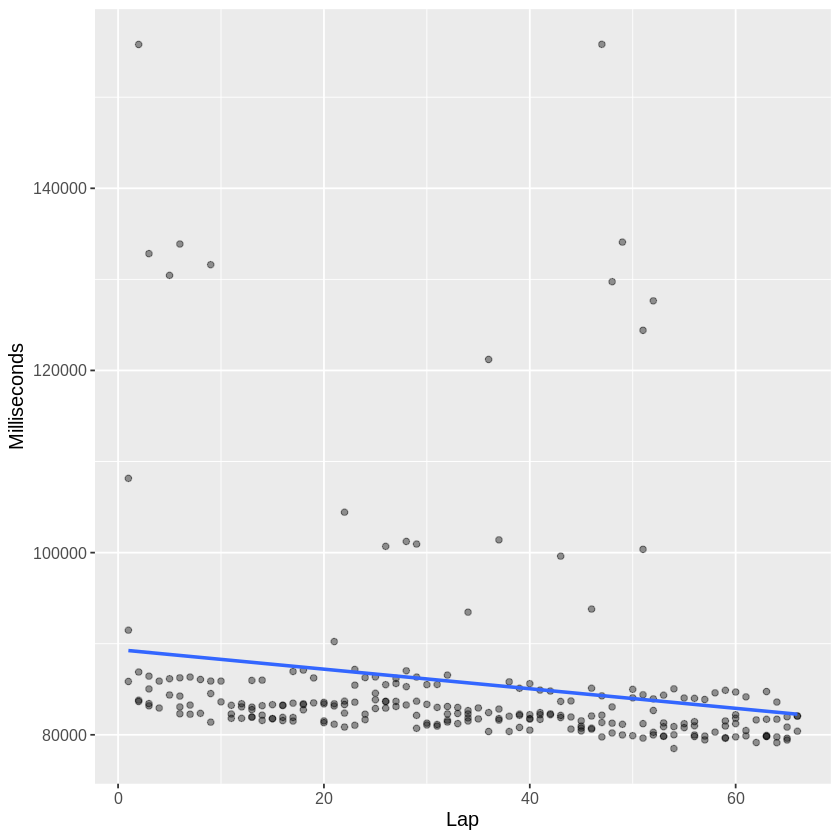

In [10]:
set.seed(2022)

#6.  Spain

lh_spain <- ham_laps %>%
                filter(raceId %in% spain_race_ID) 

lh_spain_clean <- lh_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_spain_clean
lh_spain_clean_ID <- lh_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_spain_races <- ham_laps %>%
                    filter(raceId %in% lh_spain_clean_ID)

formulaone_split <- initial_split(lh_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
953,78
974,78
994,78
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



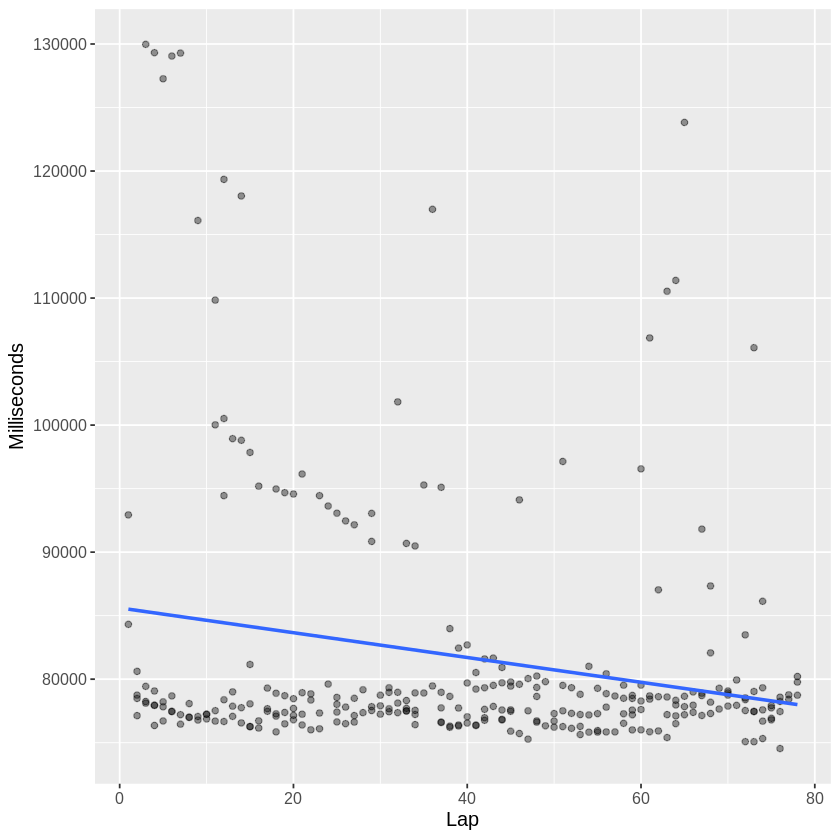

In [11]:
set.seed(2022)

#7.   Monaco

lh_monaco <- ham_laps %>%
                filter(raceId %in% monaco_race_ID) 

lh_monaco_clean <- lh_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_monaco_clean
lh_monaco_clean_ID <- lh_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monaco_races <- ham_laps %>%
                    filter(raceId %in% lh_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
976,51
992,51
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



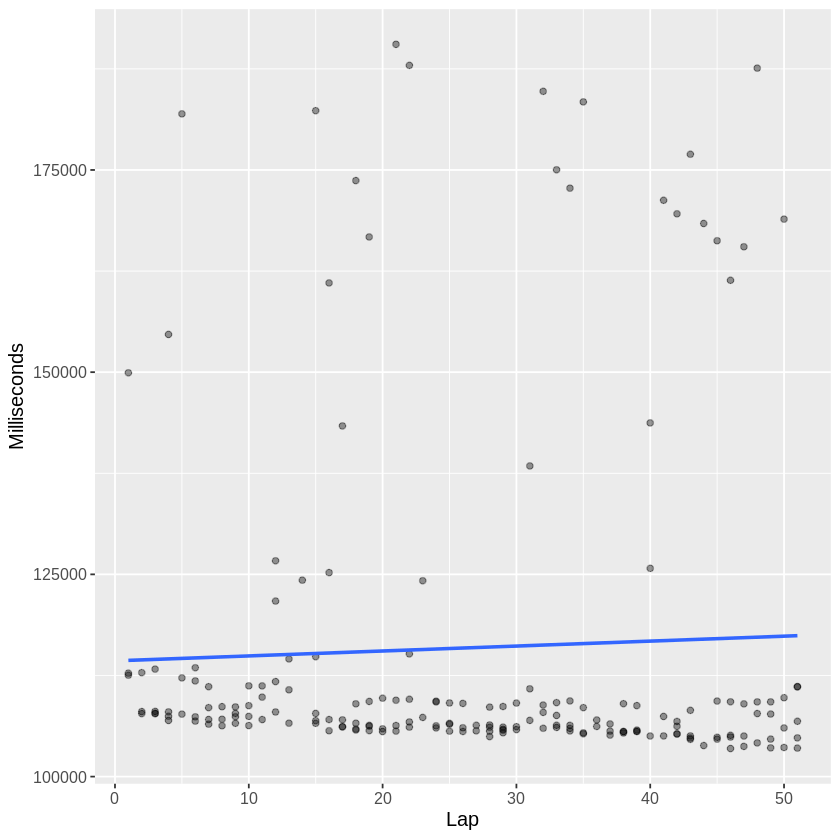

In [12]:
set.seed(2022)

#8.  Azerbaijan

lh_azerbaijan <- ham_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

lh_azerbaijan_clean <- lh_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_azerbaijan_clean
lh_azerbaijan_clean_ID <- lh_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_azerbaijan_races <- ham_laps %>% 
                    filter(raceId %in% lh_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
954,70
975,70
1016,70
995,68


`geom_smooth()` using formula 'y ~ x'



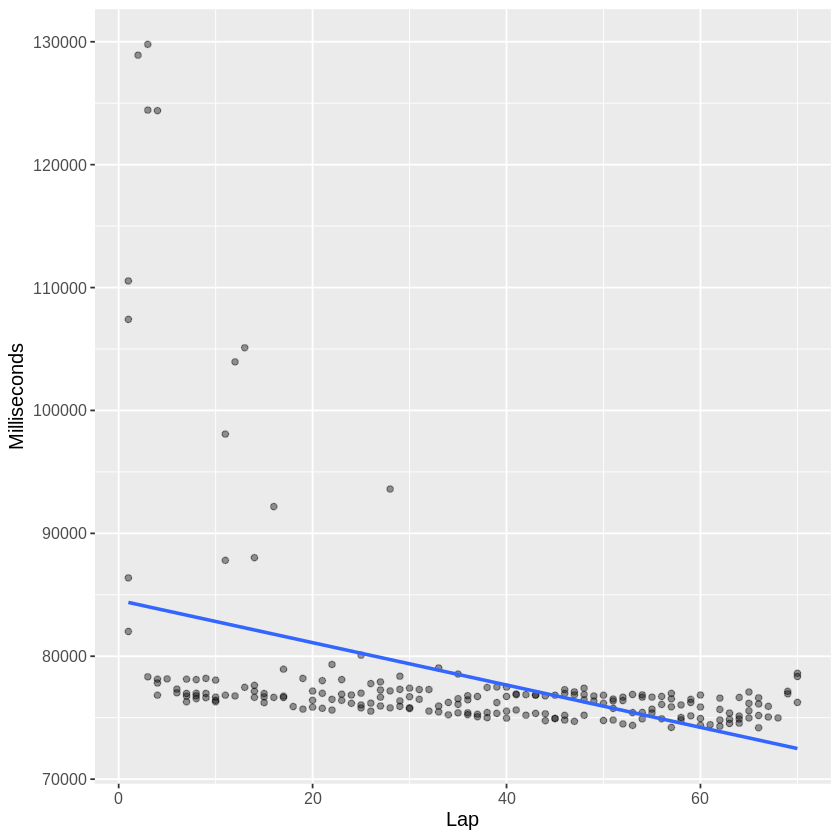

In [13]:
set.seed(2022)

#9.  Canada

lh_canada <- ham_laps %>%
                filter(raceId %in% canada_race_ID) 

lh_canada_clean <- lh_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 68 | n == 70)
lh_canada_clean
lh_canada_clean_ID <- lh_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_canada_races <- ham_laps %>%
                    filter(raceId %in% lh_canada_clean_ID)

formulaone_split <- initial_split(lh_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



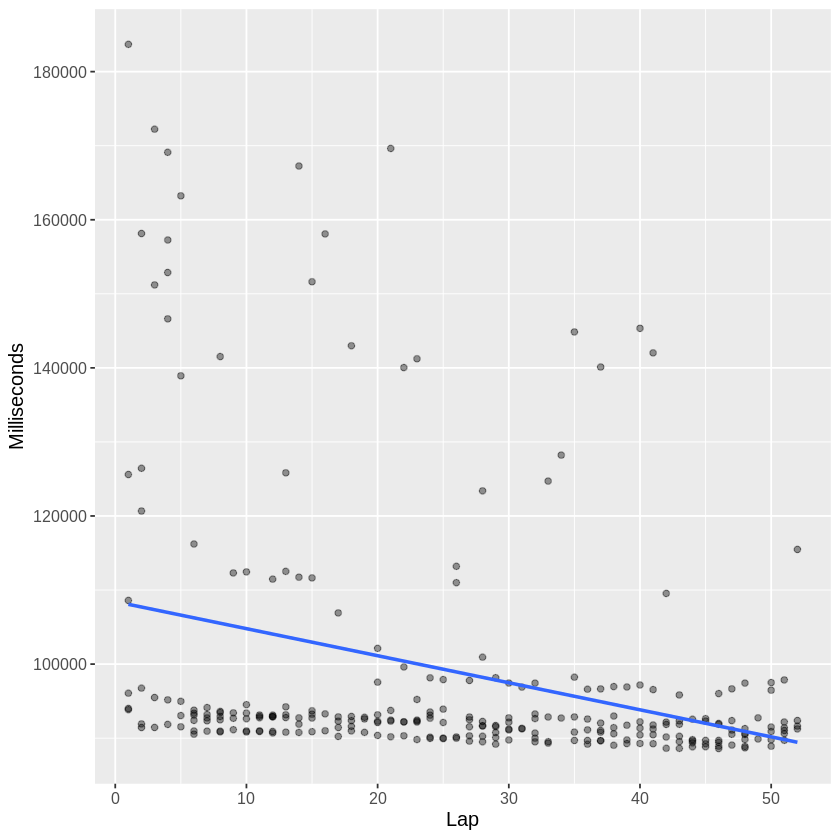

In [14]:
set.seed(2022)

#10.  Great Britain

lh_uk <- ham_laps %>%
                filter(raceId %in% uk_race_ID) 

lh_uk_clean <- lh_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 52 | n == 51)

lh_uk_clean_ID <- lh_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uk_races <- ham_laps %>%
                    filter(raceId %in% lh_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



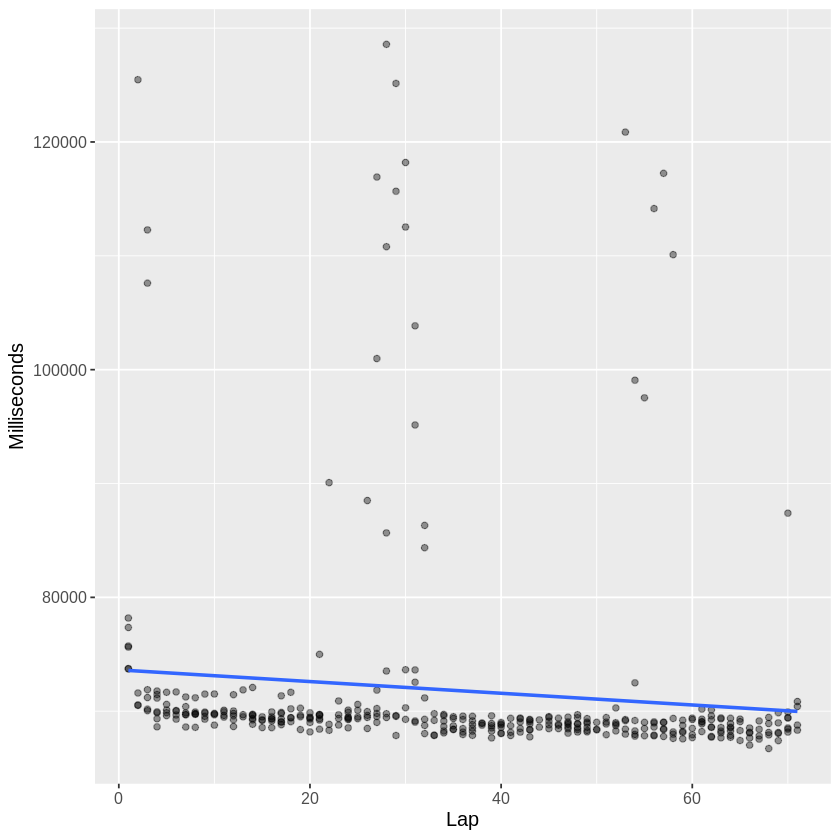

In [15]:
set.seed(2022)

#11.  Austria

lh_austria <- ham_laps %>%
                filter(raceId %in% austria_race_ID) 

lh_austria_clean <- lh_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 62)

lh_austria_clean_ID <- lh_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austria_races <- ham_laps %>%
                    filter(raceId %in% lh_austria_clean_ID)

formulaone_split <- initial_split(lh_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



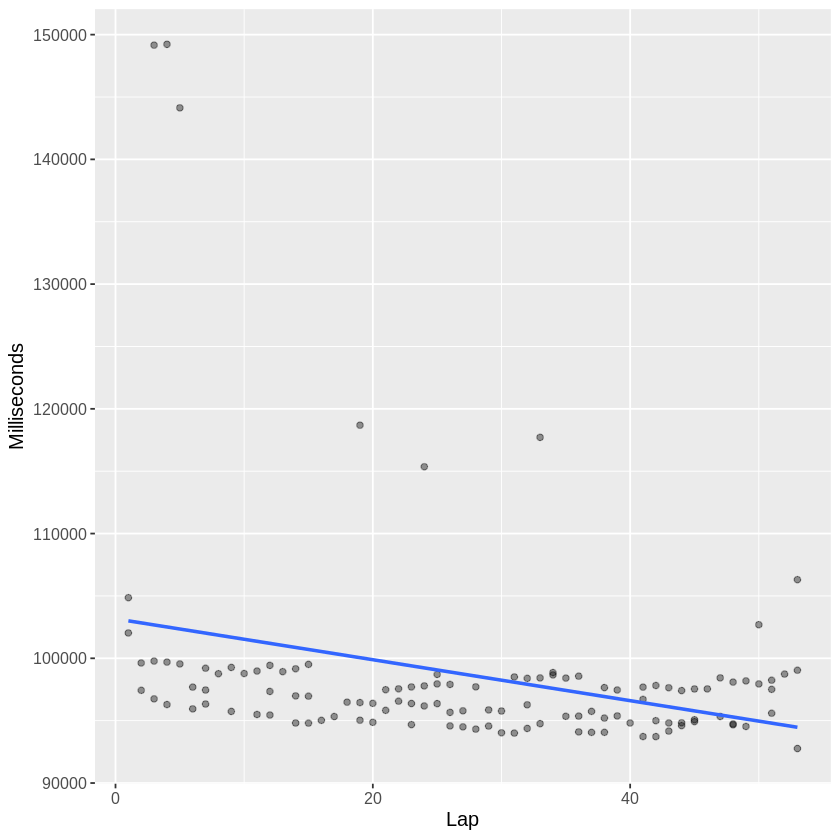

In [16]:
set.seed(2022)

#12.  France

lh_france <- ham_laps %>%
                filter(raceId %in% france_race_ID) 

lh_france_clean <- lh_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_france_clean
lh_france_clean_ID <- lh_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_france_races <- ham_laps %>%
                    filter(raceId %in% lh_france_clean_ID)

formulaone_split <- initial_split(lh_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



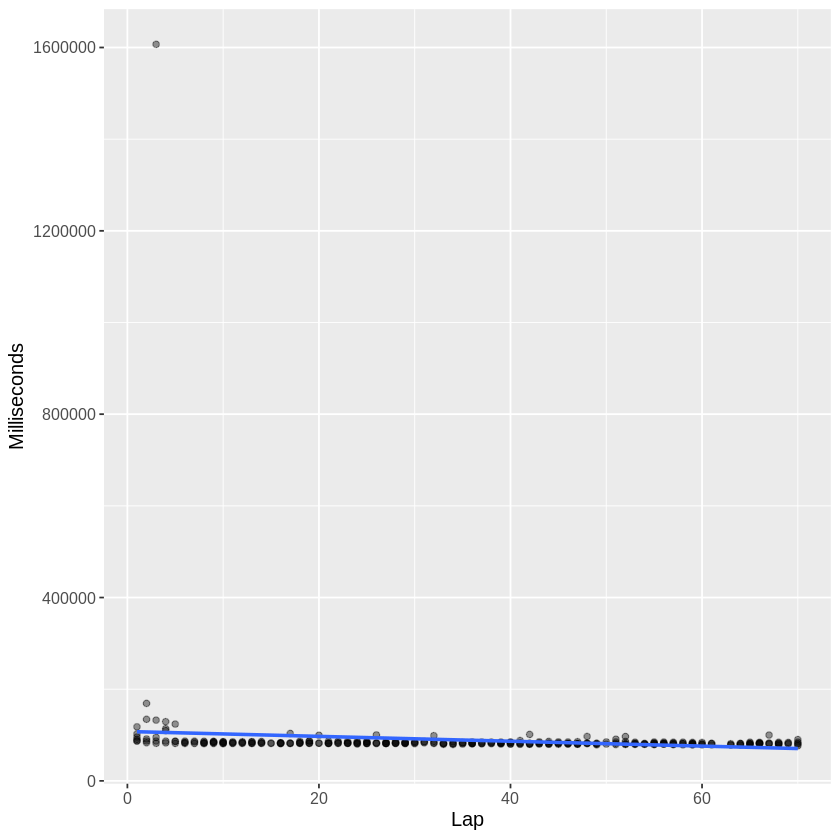

In [17]:
set.seed(2022)

#13.  Hungary

lh_hungary <- ham_laps %>%
                filter(raceId %in% hungary_race_ID) 

lh_hungary_clean <- lh_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 23)

lh_hungary_clean_ID <- lh_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_hungary_races <- ham_laps %>%
                    filter(raceId %in% lh_hungary_clean_ID) 

formulaone_split <- initial_split(lh_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

## GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
960,44
980,44
1001,44
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



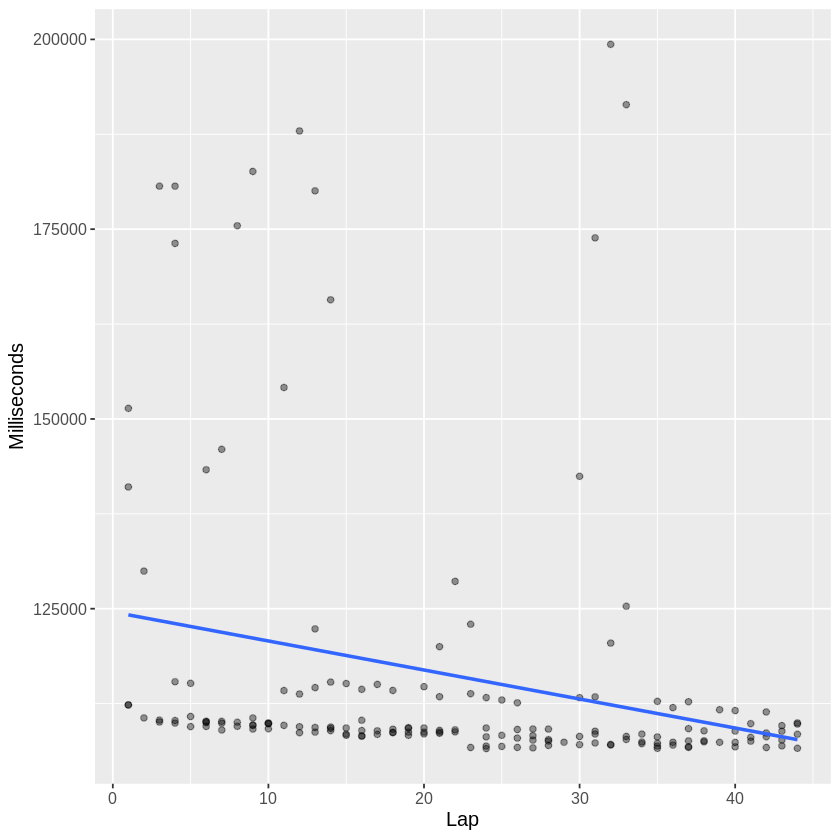

In [18]:
set.seed(2022)

#14.  Belgium

lh_belgium <- ham_laps %>%
                filter(raceId %in% belgium_race_ID) 

lh_belgium_clean <- lh_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 44 | n== 43)
lh_belgium_clean
lh_belgium_clean_ID <- lh_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_belgium_races <- ham_laps %>%
                    filter(raceId %in% lh_belgium_clean_ID)

formulaone_split <- initial_split(lh_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



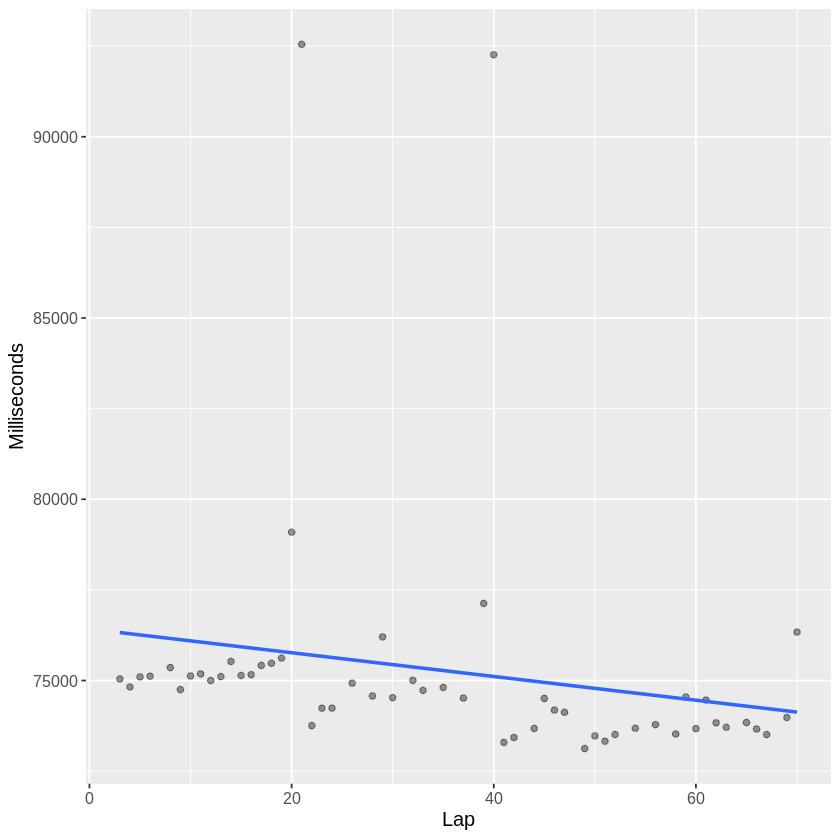

In [19]:
set.seed(2022)

#15.  Netherlands

lh_netherlands <- ham_laps %>%
                filter(raceId %in% netherlands_race_ID) 

lh_netherlands_clean <- lh_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_netherlands_clean
lh_netherlands_clean_ID <- lh_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_netherlands_races <- ham_laps %>%
                    filter(raceId %in% lh_netherlands_clean_ID)

formulaone_split <- initial_split(lh_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
961,53
981,53
1002,53
1023,53
1038,53


`geom_smooth()` using formula 'y ~ x'



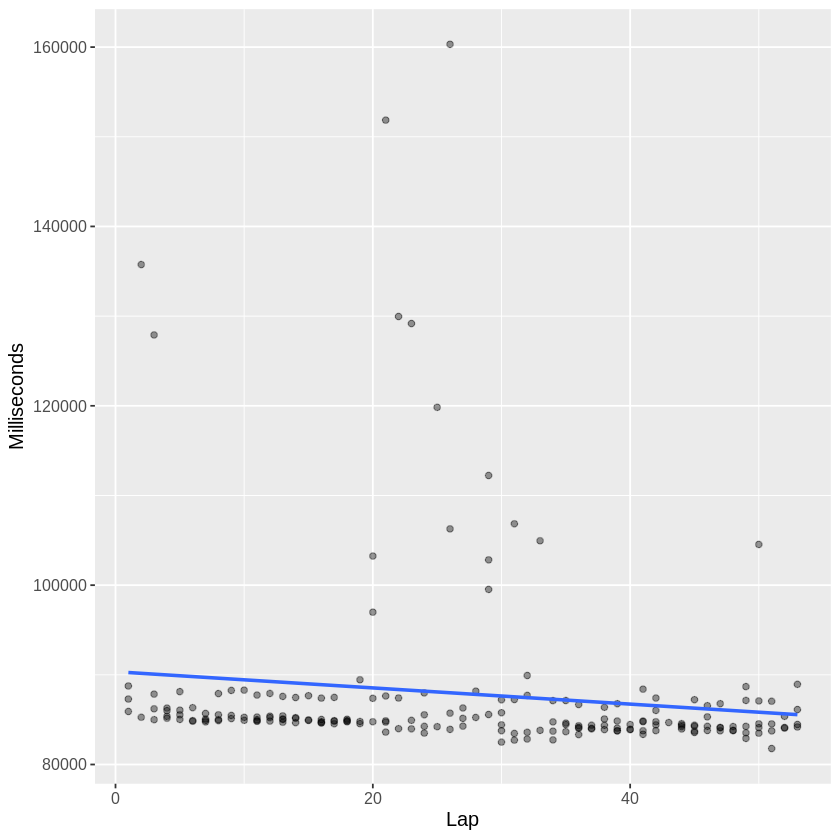

In [20]:
set.seed(2022)

#16.  Italy, Monza

lh_monza <- ham_laps %>%
                filter(raceId %in% monza_race_ID) 

lh_monza_clean <- lh_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 25)
lh_monza_clean
lh_monza_clean_ID <- lh_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monza_races <- ham_laps %>%
                    filter(raceId %in% lh_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



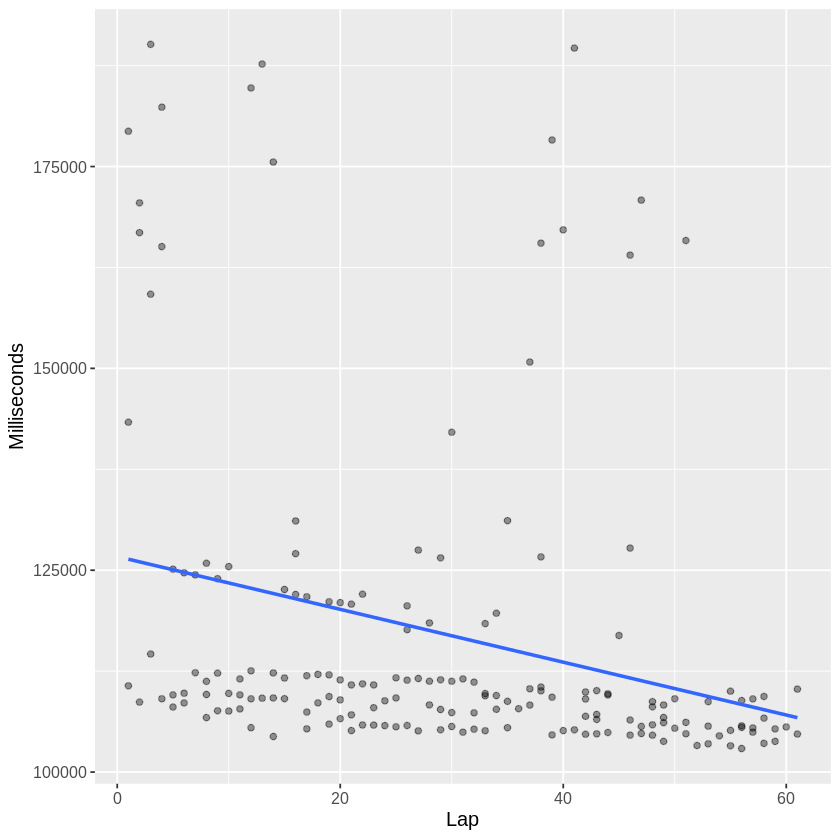

In [21]:
set.seed(2022)

#17.  Singapore

lh_singapore <- ham_laps %>%
                filter(raceId %in% singapore_race_ID) 

lh_singapore_clean <- lh_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 61| n == 60| n == 58)

lh_singapore_clean_ID <- lh_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_singapore_races <- ham_laps %>%
                    filter(raceId %in% lh_singapore_clean_ID)

formulaone_split <- initial_split(lh_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



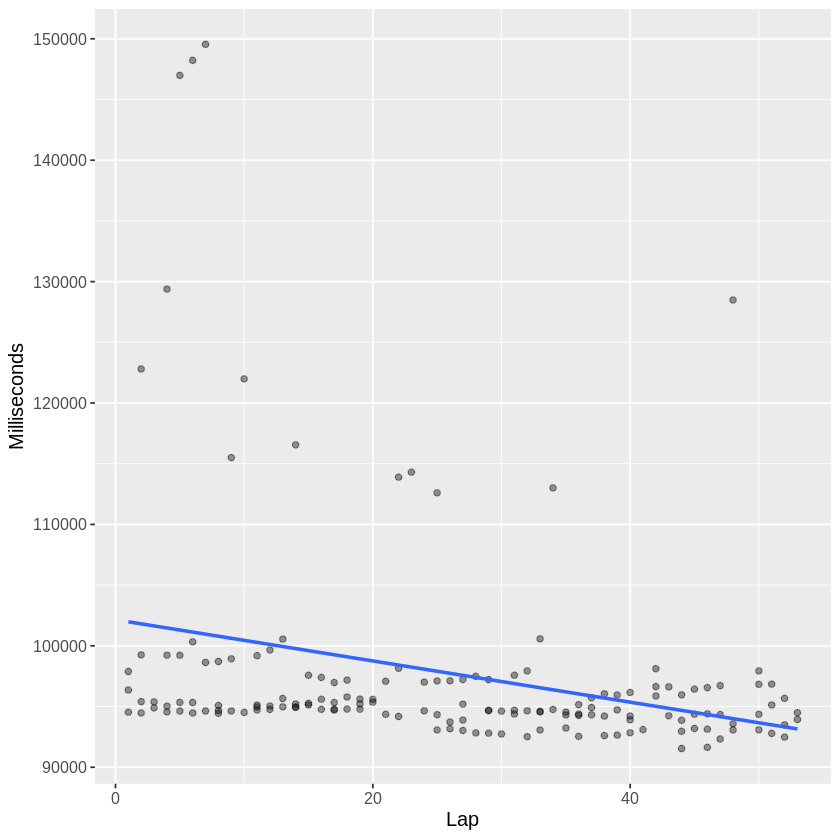

In [22]:
set.seed(2022)

#18.  Japan

lh_japan <- ham_laps %>%
                filter(raceId %in% japan_race_ID) 

lh_japan_clean <- lh_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 53| n == 52)

lh_japan_clean_ID <- lh_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_japan_races <- ham_laps %>%
                    filter(raceId %in% lh_japan_clean_ID)

formulaone_split <- initial_split(lh_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



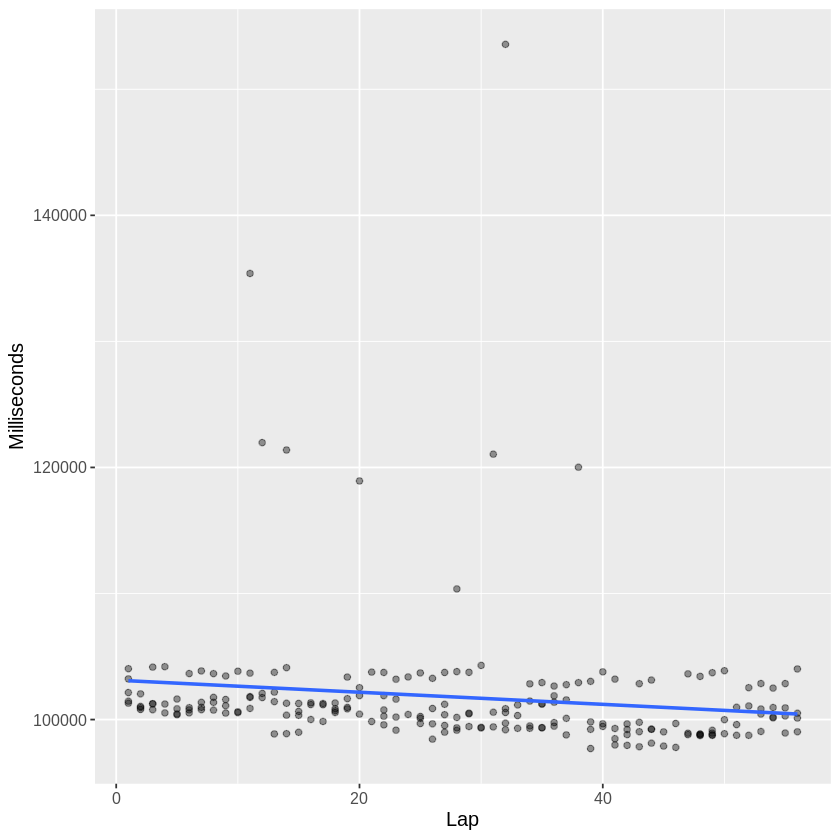

In [23]:
set.seed(2022)

#19.  USA, Austin

lh_austin <- ham_laps %>%
                filter(raceId %in% austin_race_ID) 

lh_austin_clean <- lh_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_austin_clean_ID <- lh_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austin_races <- ham_laps %>%
                    filter(raceId %in% lh_austin_clean_ID)

formulaone_split <- initial_split(lh_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



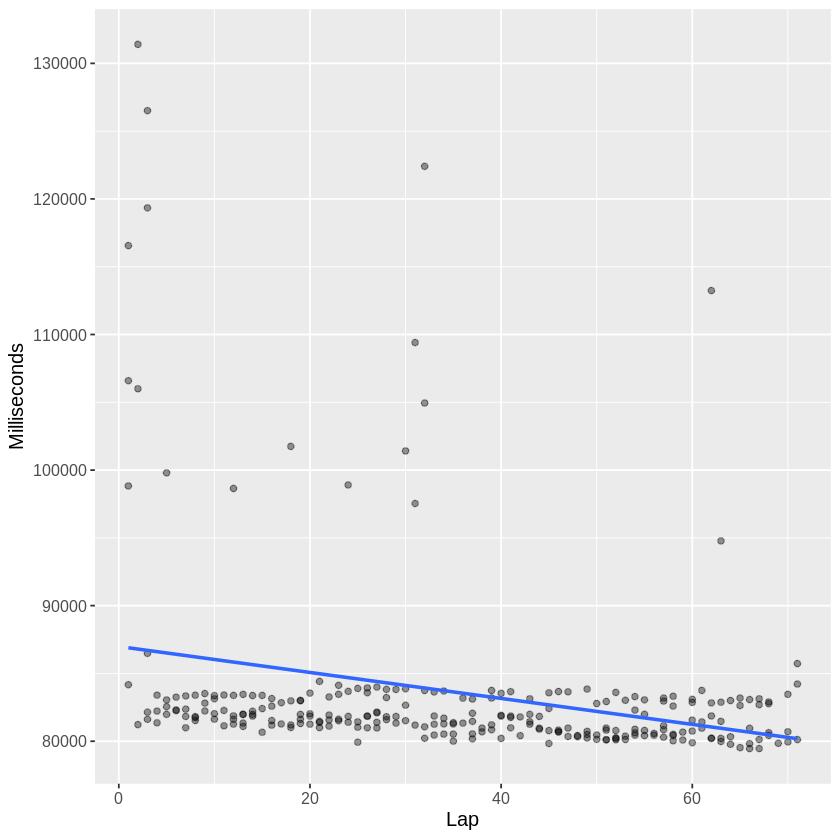

In [24]:
set.seed(2022)

#20.  Mexico

lh_mexico <- ham_laps %>%
                filter(raceId %in% mexico_race_ID) 

lh_mexico_clean <- lh_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_mexico_clean_ID <- lh_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_mexico_races <- ham_laps %>%
                    filter(raceId %in% lh_mexico_clean_ID)

formulaone_split <- initial_split(lh_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



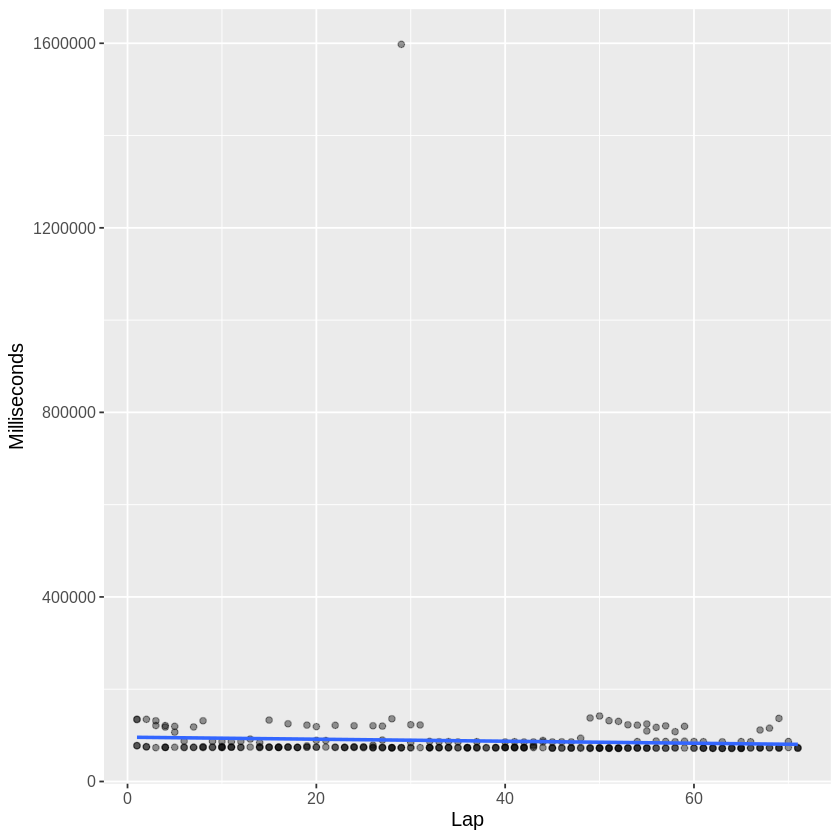

In [25]:
set.seed(2022)

#21. Brazil

lh_brazil <- ham_laps %>%
                filter(raceId %in% brazil_race_ID) 

lh_brazil_clean <- lh_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 71| n == 70)

lh_brazil_clean_ID <- lh_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_brazil_races <- ham_laps %>%
                    filter(raceId %in% lh_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
968,55
988,55
1009,55
1030,55
1047,55


`geom_smooth()` using formula 'y ~ x'



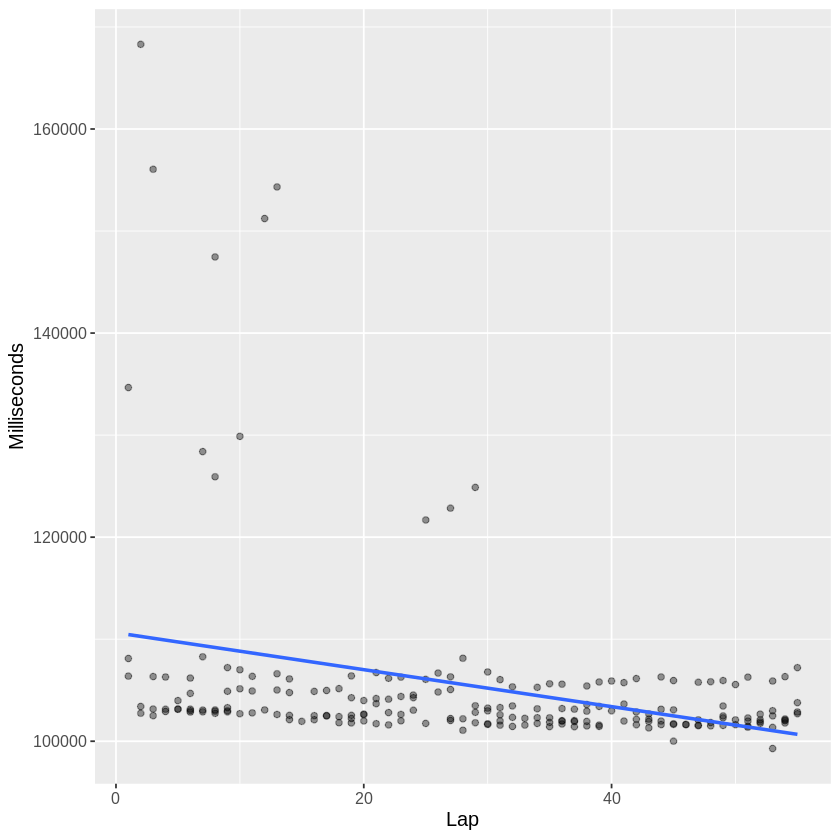

In [26]:
set.seed(2022)

#22.  Abu Dhabi

lh_uae <- ham_laps %>%
                filter(raceId %in% uae_race_ID) 

lh_uae_clean <- lh_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 55)
lh_uae_clean
lh_uae_clean_ID <- lh_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uae_races <- ham_laps %>%
                    filter(raceId %in% lh_uae_clean_ID)

formulaone_split <- initial_split(lh_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

lh_merge <- merge(rmse_col, racetime_col)

lh_merge

write_csv(lh_merge, "final_race_data/lh_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,10951.013,1
rmse,standard,13085.420,2
rmse,standard,9179.913,3
rmse,standard,23424.715,4
rmse,standard,8254.319,5
rmse,standard,12187.055,6
rmse,standard,7871.228,7
rmse,standard,174129.590,8
rmse,standard,6288.739,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5676522,94.60869,1.576812,1
5507143,91.78572,1.529762,2
5269263,87.82105,1.463684,3
5569511,92.82519,1.547086,4
5714323,95.23872,1.587312,5
5659856,94.33094,1.572182,6
6376881,106.28134,1.771356,7
5910726,98.51210,1.641868,8
5490444,91.50739,1.525123,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,10951.013,5676522,94.60869,1.576812
2,rmse,standard,13085.420,5507143,91.78572,1.529762
3,rmse,standard,9179.913,5269263,87.82105,1.463684
4,rmse,standard,23424.715,5569511,92.82519,1.547086
5,rmse,standard,8254.319,5714323,95.23872,1.587312
6,rmse,standard,12187.055,5659856,94.33094,1.572182
7,rmse,standard,7871.228,6376881,106.28134,1.771356
8,rmse,standard,174129.590,5910726,98.51210,1.641868
9,rmse,standard,6288.739,5490444,91.50739,1.525123
